# Nuova sezione
**FINAL RESULTS**

This notebook checks for metrics and confusion matrices calculate over the test set created by hand.
All the model will be displayed

In [ ]:
from google.colab import drive
import os
import shutil
import numpy as np
import random as rn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%ls

Mounted at /gdrive
/gdrive
MyDrive/  Shareddrives/


In [ ]:
!unzip -q "Shareddrives/industrial/modelli/batch.zip" -d "/"

In [ ]:
!unzip -q "Shareddrives/industrial/data/test_hand.zip" -d "/"

In [ ]:
!unzip -q "Shareddrives/industrial/modelli/VGG16Test2.zip" -d "/content"

In [ ]:
# Default values to load the dataset
BATCH_SIZE = 32
IMAGE_HEIGHT = 300
IMAGE_WIDTH = 200
RANDOM_SEED = 42
TEST_HAND_PATH = "/content/test_hand"



In [ ]:
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_HAND_PATH , labels='inferred', label_mode='categorical',
    class_names=None, color_mode='rgb', batch_size=BATCH_SIZE, image_size=(IMAGE_HEIGHT,
    IMAGE_WIDTH), shuffle=False,interpolation='bilinear', follow_links=False
)


Found 404 files belonging to 3 classes.


In [ ]:
def confusion_matrix (model):
 
  y_score = model.predict(test_images)
  y_pred = y_score.argmax(axis=1)
  y_true = tf.concat([labels_batch for data_batch, labels_batch in test_images], axis = 0)
  rounded_labels=np.argmax(y_true, axis=1)
  
  print("Classification report: ")
  print(metrics.classification_report(rounded_labels,y_pred,digits = 4))
  metrics.ConfusionMatrixDisplay.from_predictions(rounded_labels, y_pred)

# Nuova sezione
**MODEL LOADING**

In [ ]:
vgg_Fine_Dropout1 = models.load_model('/content/model/CNN_pretrained/CNN_VGG16_Dropout_fineTuning/model.h5')
vgg_Fine_Dropout2 = models.load_model('/content/model/CNN_pretrained/CNN_VGG16_Dropout_fineTuning2/model.h5')
vgg_Extraction = models.load_model('/content/model/CNN_pretrained/CNN_VGG16_standard/model.h5')

8/8 [==============================] - 12s 386ms/step
Classification report: 
              precision    recall  f1-score   support

           0     0.8923    0.7160    0.7945        81
           1     0.6944    1.0000    0.8197        75
           2     0.9857    0.7931    0.8790        87

    accuracy                         0.8313       243
   macro avg     0.8575    0.8364    0.8311       243
weighted avg     0.8647    0.8313    0.8325       243



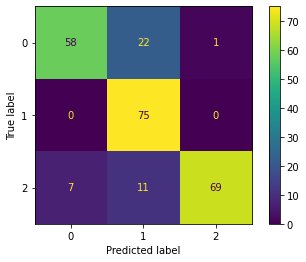

In [ ]:
confusion_matrix(vgg_Fine_Dropout1)

8/8 [==============================] - 1s 154ms/step
Classification report: 
              precision    recall  f1-score   support

           0     0.9254    0.7654    0.8378        81
           1     0.8049    0.8800    0.8408        75
           2     0.8723    0.9425    0.9061        87

    accuracy                         0.8642       243
   macro avg     0.8675    0.8627    0.8616       243
weighted avg     0.8692    0.8642    0.8632       243



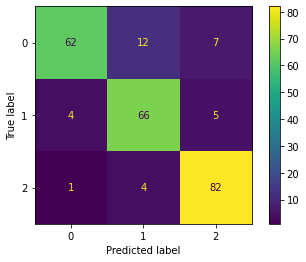

In [ ]:
confusion_matrix(vgg_Fine_Dropout2)

8/8 [==============================] - 1s 146ms/step
Classification report: 
              precision    recall  f1-score   support

           0     0.9118    0.7654    0.8322        81
           1     0.8072    0.8933    0.8481        75
           2     0.8696    0.9195    0.8939        87

    accuracy                         0.8601       243
   macro avg     0.8629    0.8594    0.8581       243
weighted avg     0.8644    0.8601    0.8592       243



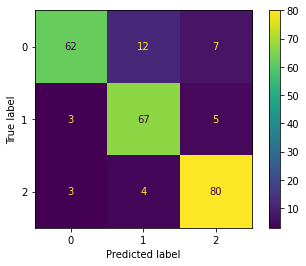

In [ ]:
confusion_matrix(vgg_Extraction)